In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('train_test_3.csv', usecols=[2,17])
print(df1)

        DEP_DEL15                 DEPARTING_AIRPORT
0               1            McCarran International
1               0      Newark Liberty International
2               0               Logan International
3               1                         LaGuardia
4               0  Phoenix Sky Harbor International
...           ...                               ...
196222          0            San Jose International
196223          0  Austin - Bergstrom International
196224          0          Houston Intercontinental
196225          1      Chicago O'Hare International
196226          0        Philadelphia International

[196227 rows x 2 columns]


In [3]:
#Percentages of flights from all airports that are on-time
df1['DEP_DEL15'].value_counts(normalize = True)* 100

0    82.570696
1    17.429304
Name: DEP_DEL15, dtype: float64

In [7]:
ontime_df = pd.DataFrame(df1.groupby('DEPARTING_AIRPORT')['DEP_DEL15'].value_counts(normalize = True)* 100)
print(ontime_df.to_markdown())

|                                                   |   DEP_DEL15 |
|:--------------------------------------------------|------------:|
| ('Albuquerque International Sunport', 0)          |    88.2716  |
| ('Albuquerque International Sunport', 1)          |    11.7284  |
| ('Anchorage International', 0)                    |    90.593   |
| ('Anchorage International', 1)                    |     9.40695 |
| ('Atlanta Municipal', 0)                          |    86.5155  |
| ('Atlanta Municipal', 1)                          |    13.4845  |
| ('Austin - Bergstrom International', 0)           |    86.6985  |
| ('Austin - Bergstrom International', 1)           |    13.3015  |
| ('Birmingham Airport', 0)                         |    83.0935  |
| ('Birmingham Airport', 1)                         |    16.9065  |
| ('Boise Air Terminal', 0)                         |    87.3377  |
| ('Boise Air Terminal', 1)                         |    12.6623  |
| ('Bradley International', 0)                  

#Above average on time
Albuquerque International Sunport
Anchorage International
Atlanta Municipal
Austin - Bergstrom International
Birmingham Airport
Boise Air Terminal
Bradley International
Charleston International
Dallas Love Field
Douglas Municipal
El Paso International
Greenville-Spartanburg
Hollywood-Burbank Midpoint
Honolulu International
Houston Intercontinental
Indianapolis Muni/Weir Cook
Jacksonville International
Kahului Airport
Kansas City International
Keahole
Lihue Airport
Long Beach Daugherty Field
Louis Armstrong New Orleans International
McGhee Tyson
Memphis International
Metropolitan Oakland International
Minneapolis-St Paul International
Ontario International
Orange County
Palm Springs International
Philadelphia International
Phoenix Sky Harbor International
Piedmont Triad International
Pittsburgh International
Reno/Tahoe International
Richmond International
Sacramento International
Salt Lake City International
San Antonio International
San Diego International Lindbergh Fl
San Jose International
Seattle International

#Less than Average on-time
Chicago Midway International
Chicago O'Hare International
Cincinnati/Northern Kentucky International
Cleveland-Hopkins International
Dallas Fort Worth Regional
Des Moines Municipal
Detroit Metro Wayne County
Eppley Airfield
Fort Lauderdale-Hollywood International
Friendship International
General Mitchell Field
Greater Buffalo International
John F. Kennedy International
Kent County
LaGuardia
Lambert-St. Louis International
Logan International
Los Angeles International
McCarran International
Miami International
Nashville International
Newark Liberty International
Norfolk International
Orlando International
Palm Beach International
Port Columbus International
Puerto Rico International
Raleigh-Durham International
Ronald Reagan Washington National
San Francisco International
Savannah/Hilton Head International
Southwest Florida International

In [39]:
df = pd.read_csv('train_test_3.csv', usecols = [0,1,4,8,17])
df

,MONTH,DAY_OF_WEEK,DEP_BLOCK,CARRIER_NAME,DEPARTING_AIRPORT
0,1,1,EVENING,Spirit Air Lines,McCarran International
1,1,2,LATE_NIGHT,United Air Lines Inc.,Newark Liberty International
2,1,5,MORNING,Spirit Air Lines,Logan International
3,1,5,AFTERNOON,American Airlines Inc.,LaGuardia
4,1,7,AFTERNOON,Delta Air Lines Inc.,Phoenix Sky Harbor International
...,...,...,...,...,...
196222,1,4,LATE_NIGHT,JetBlue Airways,San Jose International
196223,1,4,MORNING,Delta Air Lines Inc.,Austin - Bergstrom International
196224,1,4,AFTERNOON,Mesa Airlines Inc.,Houston Intercontinental
196225,1,7,MIDDAY,Atlantic Southeast Airlines,Chicago O'Hare International


In [38]:
df.describe()

,MONTH,DAY_OF_WEEK,AIRLINE_AIRPORT_FLIGHTS_MONTH
count,196227.0,196227.000000,196227.000000
mean,1.0,3.835930,3238.013123
std,0.0,1.917874,3900.000933
min,1.0,1.000000,1.000000
25%,1.0,2.000000,657.000000
50%,1.0,4.000000,2114.000000
75%,1.0,5.000000,4483.000000
max,1.0,7.000000,18809.000000


4    17.072064
3    16.544105
2    15.938683
5    13.843151
1    13.504258
7    12.488597
6    10.609141
Name: DAY_OF_WEEK, dtype: float64

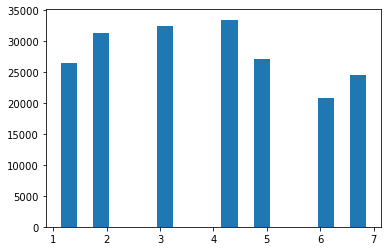

In [101]:
import matplotlib.pyplot as plt
plt.hist(df['DAY_OF_WEEK'], rwidth = .5)
df['DAY_OF_WEEK'].value_counts(normalize = True)* 100

MORNING          26.023432
AFTERNOON        23.782150
EVENING          22.796047
MIDDAY           18.740540
LATE_NIGHT        6.540384
EARLY_MORNING     2.117446
Name: DEP_BLOCK, dtype: float64

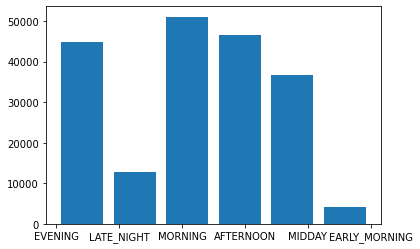

In [97]:
plt.hist(df['DEP_BLOCK'],rwidth=.8, bins = 6)
df['DEP_BLOCK'].value_counts(normalize = True)* 100

In [126]:
df.loc[df['DEP_BLOCK'] == 'EARLY_MORNING', 'BLOCK_NUM'] = 1 
df.loc[df['DEP_BLOCK'] == 'MORNING', 'BLOCK_NUM'] = 2
df.loc[df['DEP_BLOCK'] == 'AFTERNOON', 'BLOCK_NUM'] = 3
df.loc[df['DEP_BLOCK'] == 'MIDDAY', 'BLOCK_NUM'] = 4
df.loc[df['DEP_BLOCK'] == 'EVENING', 'BLOCK_NUM'] = 5 
df.loc[df['DEP_BLOCK'] == 'LATE_NIGHT', 'BLOCK_NUM'] = 6
print(df['BLOCK_NUM'].corr(df['DEP_DEL15']))
print(df['BLOCK_NUM'].corr(df['CONCURRENT_FLIGHTS']))

0.11442732898740465
-0.028097880170343727


In [2]:
df = pd.read_csv('train_test_3.csv')
df

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,1,1,1,EVENING,3,83,145,Spirit Air Lines,13056,...,12,McCarran International,36.080,-115.152,Metropolitan Oakland International,0.00,0.0,0.0,69,5.14
1,1,2,0,1,LATE_NIGHT,4,18,120,United Air Lines Inc.,10281,...,18,Newark Liberty International,40.696,-74.172,Gallatin Field,0.15,0.0,0.0,44,2.46
2,1,5,0,5,MORNING,1,125,178,Spirit Air Lines,10728,...,6,Logan International,42.364,-71.006,NONE,0.00,0.0,0.0,30,18.12
3,1,5,1,5,AFTERNOON,2,86,172,American Airlines Inc.,13375,...,1,LaGuardia,40.779,-73.876,Miami International,0.00,0.0,0.0,47,9.84
4,1,7,0,6,AFTERNOON,3,114,191,Delta Air Lines Inc.,14576,...,1,Phoenix Sky Harbor International,33.436,-112.009,Detroit Metro Wayne County,0.01,0.0,0.0,63,2.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196222,1,4,0,11,LATE_NIGHT,3,6,129,JetBlue Airways,4845,...,11,San Jose International,37.363,-121.941,John F. Kennedy International,0.00,0.0,0.0,58,2.68
196223,1,4,0,5,MORNING,1,46,110,Delta Air Lines Inc.,4887,...,19,Austin - Bergstrom International,30.194,-97.670,NONE,0.00,0.0,0.0,61,3.36
196224,1,4,0,2,AFTERNOON,1,112,76,Mesa Airlines Inc.,14501,...,5,Houston Intercontinental,29.983,-95.340,NONE,0.17,0.0,0.0,85,13.42
196225,1,7,1,2,MIDDAY,1,177,50,Atlantic Southeast Airlines,23400,...,17,Chicago O'Hare International,41.978,-87.906,NONE,0.01,0.3,2.0,31,12.53


In [14]:
latlon = df[['DEPARTING_AIRPORT','LATITUDE','LONGITUDE','AIRPORT_FLIGHTS_MONTH']]
latlon = latlon.drop_duplicates()
latlon

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 8307
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DEPARTING_AIRPORT      84 non-null     object 
 1   LATITUDE               84 non-null     float64
 2   LONGITUDE              84 non-null     float64
 3   AIRPORT_FLIGHTS_MONTH  84 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [21]:
import plotly.graph_objects as go
#latlon['txt'] = latlon['AIRPORT_FLIGHTS_MONTH'] + '' + latlon['AIRPORT_FLIGHTS_MONTH'].astype(str)
fig = go.Figure(data = go.Scattergeo(lon = latlon['LONGITUDE'], 
                                     lat = latlon['LATITUDE'], 
                                     text = latlon['DEPARTING_AIRPORT'] ))
                                     #,  
                                     #mode = 'markers',
                                     #marker_color = latlon['AIRPORT_FLIGHTS_MONTH']
                                    #))
fig.update_layout(title = 'Airports of the US', geo_scope = 'north america')
fig.show()

In [5]:
fig = go.Figure(data = go.Scattergeo(lon = latlon['LONGITUDE'], 
                                     lat = latlon['LATITUDE'], 
                                     text = latlon['DEPARTING_AIRPORT']))
fig.update_layout(title = 'Airports of the US', geo_scope = 'usa')
fig.show()

In [124]:
df['CARRIER_NAME'].unique()
df.loc[df['CARRIER_NAME'] == 'Spirit Air Lines', 'CARRIER_NUM'] = 1 
df.loc[df['CARRIER_NAME'] == 'United Air Lines Inc.', 'CARRIER_NUM'] = 2
df.loc[df['CARRIER_NAME'] == 'American Airlines Inc.', 'CARRIER_NUM'] = 3
df.loc[df['CARRIER_NAME'] == 'Delta Air Lines Inc.', 'CARRIER_NUM'] = 4
df.loc[df['CARRIER_NAME'] == 'American Eagle Airlines Inc.', 'CARRIER_NUM'] = 5
df.loc[df['CARRIER_NAME'] == 'Midwest Airline, Inc.', 'CARRIER_NUM'] = 6
df.loc[df['CARRIER_NAME'] == 'SkyWest Airlines Inc.', 'CARRIER_NUM'] = 7 
df.loc[df['CARRIER_NAME'] == 'Frontier Airlines Inc.', 'CARRIER_NUM'] = 8
df.loc[df['CARRIER_NAME'] == 'Southwest Airlines Co.', 'CARRIER_NUM'] = 9 
df.loc[df['CARRIER_NAME'] == 'Alaska Airlines Inc.', 'CARRIER_NUM'] = 10
df.loc[df['CARRIER_NAME'] == 'Comair Inc.', 'CARRIER_NUM'] = 11
df.loc[df['CARRIER_NAME'] == 'JetBlue Airways', 'CARRIER_NUM'] = 12
df.loc[df['CARRIER_NAME'] == 'Mesa Airlines Inc.', 'CARRIER_NUM'] = 13
df.loc[df['CARRIER_NAME'] == 'Endeavor Air Inc.', 'CARRIER_NUM'] = 14
df.loc[df['CARRIER_NAME'] == 'Atlantic Southeast Airlines', 'CARRIER_NUM'] = 15
df.loc[df['CARRIER_NAME'] == 'Allegiant Air', 'CARRIER_NUM'] = 16
df.loc[df['CARRIER_NAME'] == 'Hawaiian Airlines Inc.', 'CARRIER_NUM'] = 17
df['CARRIER_NUM'].corr(df['DEP_DEL15'])

0.029742800523518912